# Pandas 시작하기

 - Numpy와 공통점:for 문을 사용하지 않고 데이터를 처리하거나 배열 기반의 함수를 제공
 - 차이점: 표현식의 데이터나 다양한 형태의 데이터를 다룰 수 있음

     pandas 라이브러리 import

In [141]:
import pandas as pd

    -  pandas는 pandas만의 자료구조를 가지고 있음 
    -  Sereis(1차원 타입)와 DataFrame(2차원 타입)의 네임스페이스 사용 

In [142]:
from pandas import Series, DataFrame

In [143]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

##  **1. pandas 자료구조 소개**

- **Series**와 **DataFrame**가 존재함

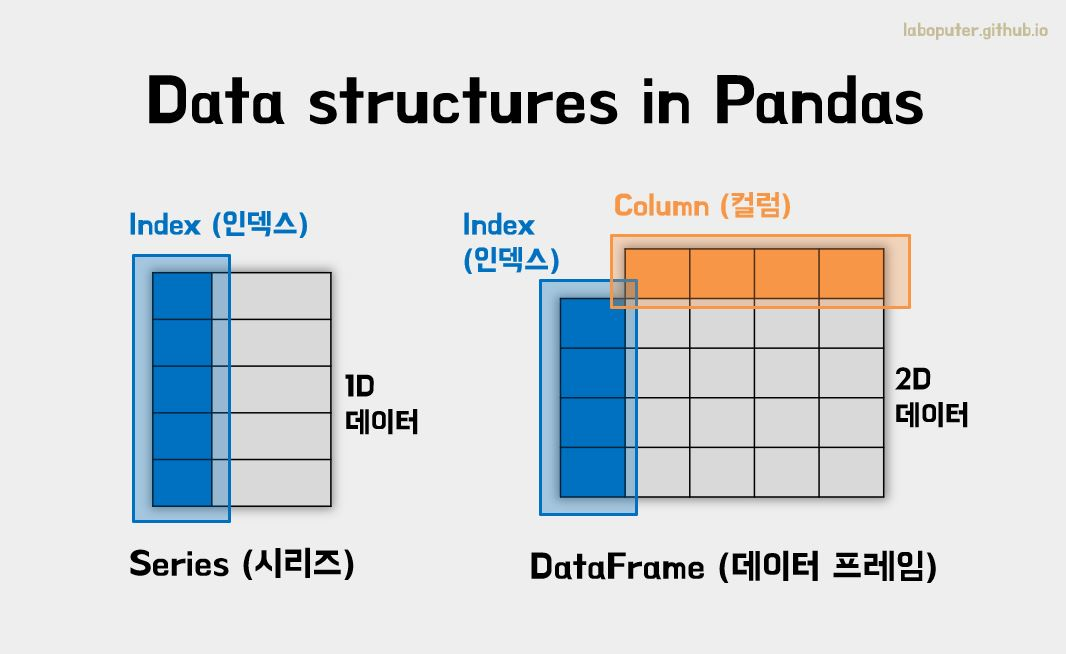
https://laboputer.github.io/machine-learning/2020/04/07/pandas-10minutes/

### **1.1 Series**

   - 일련의 객체를 담을 수 있는 1차원 배열 
     - Numpy 자료형도 모두 담을 수 있음
     - 색인(index): 지금까지 말했던 index와 조금 다른 개념임. 배열의 데이터와 연관된 이름을 지정해 줄 수 있음
     

[배열 데이터로 Series 객체 생성]

In [144]:
obj=pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

     - 왼쪽: 색인, 오른쪽 색인의 값
     - 데이터의 색인을 정하지 않은 경우
       - 정수 0 ~ N-1(N은 데이터의 길이)까지의 숫자



     - Series의 배열: values 속성을 통해 얻음
     - Series의 색인: index 속성을 통해 얻음

In [145]:
obj.values

array([ 4,  7, -5,  3])

In [146]:
obj.index

RangeIndex(start=0, stop=4, step=1)

     - 각 데이터에 색인을 지정하기

In [147]:
obj2=pd.Series([4,7,-5,3],index=['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [148]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

     - 색인을 레이블로 사용하여 단일 값을 선택하기

In [149]:
obj2['a'] #인덱스로 값을 불러내는 일반적 과정처럼 하면 됨

-5

In [150]:
obj2['d']=6

In [151]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64


      - 색인 배열 사용하여 여러 값을 선택하기 

In [152]:
# ['c', 'a', 'd']는 색인의 배열
obj2[['c','a','d']]

c    3
a   -5
d    6
dtype: int64

     -  불리언 배열을 사용해서 값을 걸러내기

In [153]:
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

     - 산술 곱셈을 수행 

In [154]:
obj2*2

d    12
b    14
a   -10
c     6
dtype: int64

      - 산술 함수 적용 가능 

In [155]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

      - Series는 길이가 고정된 딕셔너리 개념
      -딕셔너리: {} 형태. key와 value를 가짐.

In [156]:
'b' in obj2

True

In [157]:
'e' in obj2

False

[딕셔너리 데이터를 사용하여 Series객체 생성] 

      - Series 객체의 인덱스에 딕셔너리의 키를 사용 

In [158]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

      - 색인을 직접 지정
        -  원하는 순서대로 색인 지정 가능

In [159]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 #만들어진 series를 가져다가 순서를 바꾸는 건 되는데, 새로운 인덱스를 넣는 건 안 된다.

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

     - 'California' 에 대한 값을 찾을 수 없어서 Nan(Not a Number)
        - pandas에서는 누락된 값 또는 NA 값으로 취급
     -'Utah'는 실행 결과에서 빠짐 

      - R의 경우: 
        - NA: '잘못된 값', Null: '아직 정해지지 않은 값'
      - 파이썬의 경우:
        - NaN(NA), Null:'정해지지 않은 값'


     - 누락된 데이터 찾기: notnull, isnull 함수 사용 

In [160]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [161]:
pd.notnull(obj4) #True일 경우 True가 됨

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

     - isnull은 Series의 인스턴스 메서드로도 존재

In [162]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [163]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [164]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

     - 데이터베이스의 조인과 유사
     -공통되지 않는 부분도 Nan으로 포함을 시키고 공통되는 부분은 더함

In [165]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

      - Series 객체의 name 속성 
        - 객체.name: 이름을 정해줄 수 있음음
      - Series 색인의 name 속성
        - 객체.index.name

In [166]:
obj4.name = 'population'

In [167]:
obj4.index.name = 'state'

In [168]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

      - 색인은 대입 연산을 통해 변경 가능

In [169]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [170]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### **1.2 DataFrame**

 - 표 같은 스프레드 시트 형식
   -  여러 개의 컬럼(열)으로 구성
   -  각 컬럼은 서로 다른 종류의 값(숫자, 문자열, 불리언) 등을 저장
   - 행과 열의 색인 
     - 색인의 모양이 같은 Series 객체를 담고 있는 파이썬 딕셔너리의 개념

        

[같은 길이의 리스트에 담긴 딕셔너리 또는 Numpy의 리스트 사용하여 DataFrame 객체 생성]

In [171]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

     - DataFrame의 색인 자동 대입되어 컬럼은 정렬되어 저장

In [172]:
frame
#행 쪽의 index는 자동으로 0부터 지정이 되고, 열 쪽의 index는 state, year, pop이라고 보면 됨

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


      -  head : 처음 5개의 행만 출력하는 함수

In [173]:
frame.head() #데이터의 구조를 아는 것이 중요

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


     - 원하는 순서를 가지 DataFrame 객체 생성
       - 원하는 순서대로 columns를 지정
       - columns=[] 

In [174]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


     - 원하는 index를 지정
       -  index = []

       

In [175]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


 - 딕셔너리에 없는 값은 결측치로 저장

In [176]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

     - DataFrame의 컬럼 접근
       - 딕셔너리 형식의 표기법
       - 속성 형식

In [177]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [178]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

      -  loc : 행의 이름으로 접근
        - 속성

In [179]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [180]:
#AttributeError: 'DataFrame' object has no attribute 'three': 열과 다르게 행 이름은 dataframe.행이름 으로 접근 불가가
#frame2.three

     - 컬럼(열)은 스칼라 값이나 배열의 값을 대입 가능

In [181]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


     - 리스트나 배열을 컬럼에 대입하려는 값의 길이가 DataFrame의 크기와 동일해야 함

In [182]:
frame2['debt'] = np.arange(6.) #6. :6.0을 말함함
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0



     - Series를 대입하면 DataFrame의 색인에 따라 값이 대입되며 존재하지 않는 색인에는 결측치가 대입 

In [183]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [184]:
frame2['eastern'] = frame2.state == 'Ohio' # state 값이 'Ohio'인지 판단한 값으로 새로운 컬럼생성
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


      - del: 컬럼 삭제

In [185]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

     - 중첩된 딕셔너리를 사용해서 데이터 생성

In [186]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [187]:
pop_ = {'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6},
       'Nevada': {2001: 2.4, 2002: 2.9}}

In [188]:
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

     - 중첩된 딕셔너리를 사용하여 DataFrame 만들기
       -  열(컬럼): 바깥에 있는 딕셔너리의 키
       -  행: 안에 있는 딕셔너리의 키

In [189]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [190]:
frame3_ = pd.DataFrame(pop_)
frame3_

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


     - 전치: 데이터의 행과 열을 바꾸는 것
         - 객체.T

In [191]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [140]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


     - 색인을 직접 지정하기

In [192]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


     - Series 객체를 담고있는 딕셔너리로 DataFrame 만들기

In [193]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


     - DataFrame의 색인과 컬럼에 name 속성을 지정

In [195]:
frame3.index.name = 'year'; 
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


     - values 속성: DataFrame에 저장된 데이터 2차원 배열로 반환

In [196]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

     - DataFrame이 컬럼이 서로 다른 dtype을 가지고 있다면 모든 컬럼을 수용하기 위해  그 컬럼의 배열의 dtype 선택
     -object: 모든 것을 포괄할 수 있음. 가장 상위 type이라고 보면 됨

In [197]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

**< DataFrame 생성을 위한 입력 데이터의 종류 >**

|형|설명|
|--|----|
|2차원 ndarray| 데이터를 담고 있는 행렬, 선택적으로 행과 열(컬럼)의이름을 전달 가능|
|배열, 리스트, 튜플의 딕셔너리|딕셔너리의 모든 항목은 같은 길이를 가져야함, 각 항목의 내용이 DataFrame의 컬럼|
|NumPy의 구조화된 배열|배열의 딕셔너리와 같은 방식|
|Series의 딕셔너리|Series의 각 값이 컬럼, 명시적으로 색인을 넘겨주지 않으면 각 Series의 색인이 하나로 합쳐져서 로우의 색인이 됨|
|딕셔너리의 딕셔너리|내부의 있는 사전이 커럼이 됨, 키값은 Series의 사전과 마찬가지로 합쳐져서 행의 색인이됨|
|딕셔너리나 Series의 리스트|리스트의 각 항목이 DataFrame의 행, 합쳐진 딕셔녀리의 키값이나 Series의 색인이 DataFrame의 컬럼|
|리스트나 튜플의 리스트|2차원 ndarray의 경우와 같은 방식으로 취급|
|다른 DataFrame|색인을 따로 정하지않으면 DataFrame의 색인이 그대로 사용|
|Numpy MaskedArray|2차원 ndarray의 경우와 같은 방식으로 취급되지만 마스크값은 반환되는 DataFrame에서 NA 값이 됨|


### **1.3 인덱스 객체(Index Objects)**

     - Pandas의 색인 객체: 표 형식의 데이터에서 각 로우와 컬럼에 대한 이름과 다른 메타데이터(축의 이름 등)를 저장하는 객체
       -  Series DataFrame 객체를 생성할 때 사용되는 배열이나 다른 순차적인 이름은 내부적으로 색인으로 변환

In [198]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [199]:
index[1:]

Index(['b', 'c'], dtype='object')

    - 색인 객체는 변경이 불가능




```
index[1] = 'd'  # TypeError
```



In [200]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [201]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [202]:
obj2.index is labels

True

In [203]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [204]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [205]:
'Ohio' in frame3.columns

True

In [206]:
2003 in frame3.index

False

     - Pandas의 인덱스는 중복된 값을 허용
       -  중복된 값으로 선택을 하면 해당 값을 가진 모든 항목을 선택 

In [207]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

In [208]:
dup_labels.delete(1) #원본은 유지된다.

Index(['foo', 'bar', 'bar'], dtype='object')

In [210]:
dup_labels.drop('bar') 

Index(['foo', 'foo'], dtype='object')

In [211]:
dup_labels.unique()

Index(['foo', 'bar'], dtype='object')

**< 색인 메서드와 속성 >**

|메서드|실명|
|------|----|
|append|추가적인 색인 객체를 덧붙여 새로운 색인을 반환|
|difference|색인의 차집합 반환|
|intersection|색인의 교집합 반환|
|union|색인의 합집합 반환|
|isin|색인이 넘겨받은 색인에 존재하는지 알려주는 불리언 배열을 반환|
|delete|i 위치의 색인이 삭제된 새로운 색인을 반환|
|drop|넘겨받는 값이 삭제된 새로운 색인을 반환|
|insert|i 위치에 색인이 추가된 새로운 색인 반환|
|is_monotonic|색인이 단조성을 가진다면 True를 반환|
|is_unique|중복되는 색인이 없다면 True를 반환|
|unique|색인에서 중복되는 요소를 제거하고 유일한 값만을 반환|